In [27]:
import pandas as pd
import numpy as np
from sklearn import tree

In [29]:
df=pd.read_csv("student_dataset (2).csv")

In [31]:
X=df.drop('Label',axis=1)
y=df['Label']

In [33]:
df['Label'].value_counts()

Weak        100
Advanced    100
Average     100
Name: Label, dtype: int64

In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[['Grades','Attendance','Study Hours']]=scaler.fit_transform(df[['Grades','Attendance','Study Hours']])

In [37]:
df

,Grades,Attendance,Study Hours,Label
0,-1.323472,-1.653266,-1.268335,Weak
1,-0.582935,-0.765474,-0.833974,Weak
2,-0.867757,-1.160048,-0.833974,Weak
3,-1.095615,-1.653266,-0.833974,Weak
4,-1.266508,-1.850553,-0.399612,Weak
...,...,...,...,...
295,-0.298114,-0.074969,-0.399612,Average
296,0.385459,0.122318,0.034749,Average
297,0.328495,0.516892,0.469110,Average
298,0.271530,-0.370900,-0.833974,Average


In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
clf=tree.DecisionTreeClassifier(criterion="entropy",max_depth=2,min_samples_split=10,min_samples_leaf=5,splitter='best',max_features='sqrt',ccp_alpha=0.01)
from sklearn.model_selection import cross_val_score
scores=cross_val_score(clf,X_train,Y_train,cv=5)
print("Cross-validation Accuracy:",scores.mean())
print(scores)

Cross-validation Accuracy: 0.8875
[1.         0.85416667 0.72916667 1.         0.85416667]


In [43]:
clf=clf.fit(X_train,Y_train)
prediction=clf.predict(X_test)

In [45]:
prediction

array(['Advanced', 'Advanced', 'Advanced', 'Weak', 'Average', 'Advanced',
       'Advanced', 'Advanced', 'Weak', 'Advanced', 'Average', 'Weak',
       'Average', 'Weak', 'Advanced', 'Advanced', 'Average', 'Advanced',
       'Advanced', 'Advanced', 'Weak', 'Advanced', 'Average', 'Average',
       'Advanced', 'Weak', 'Advanced', 'Average', 'Advanced', 'Average',
       'Weak', 'Advanced', 'Weak', 'Weak', 'Average', 'Advanced', 'Weak',
       'Weak', 'Weak', 'Weak', 'Weak', 'Weak', 'Average', 'Weak', 'Weak',
       'Weak', 'Advanced', 'Average', 'Advanced', 'Average', 'Advanced',
       'Advanced', 'Advanced', 'Weak', 'Advanced', 'Average', 'Weak',
       'Weak', 'Advanced', 'Weak'], dtype=object)

In [47]:
from sklearn.metrics import accuracy_score

In [49]:
print("Train data accuracy:",
      accuracy_score(y_true=Y_train,
                     y_pred=clf.predict(X_train)))
print("Test data accuracy:",
      accuracy_score(y_true=Y_test,y_pred=prediction))

Train data accuracy: 0.9125
Test data accuracy: 0.85


In [52]:
from sklearn import metrics
cf=metrics.confusion_matrix(Y_test,prediction)
cf

array([[16,  0,  0],
       [ 9, 13,  0],
       [ 0,  0, 22]], dtype=int64)

In [54]:
print("Precision",metrics.precision_score(Y_test,prediction,average=None))

Precision [0.64 1.   1.  ]


In [56]:
print("Recall",metrics.recall_score(Y_test,prediction,average=None))

Recall [1.         0.59090909 1.        ]


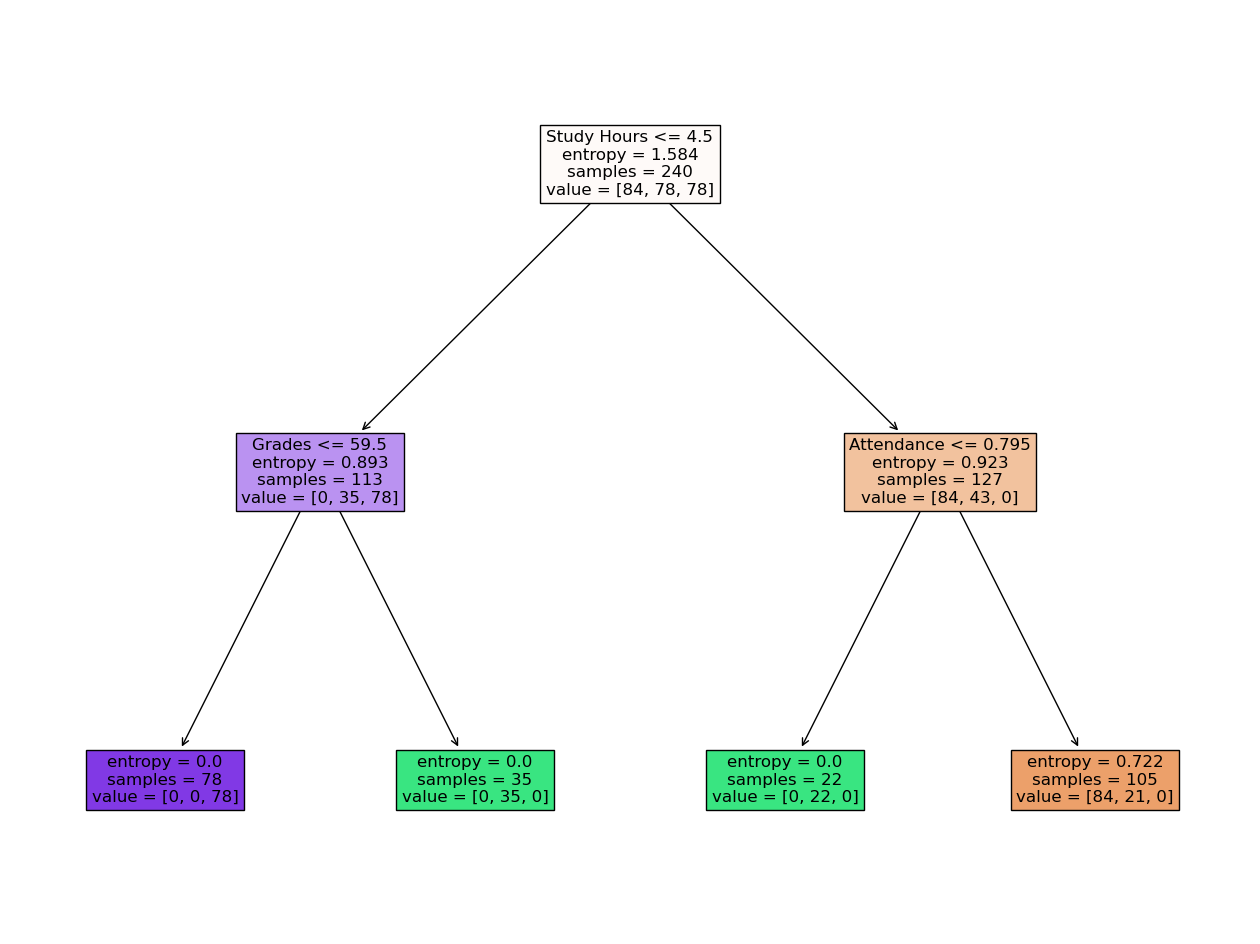

In [62]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16,12))
a=plot_tree(clf,feature_names=list(X.columns),fontsize=12,filled=True)